## Generating images using DALL-E
In this notebook we will demonstrate how to ask openAI's DALL-E model to generate some images. Depending on what we request and how the model was trained, the results may be more or less appropriate. We will again use a small helper function to return the image directly.

Read more:
* [openAI image generation documentation](https://platform.openai.com/docs/guides/images/usage)

In [1]:
import openai
from skimage.io import imread, imshow

def prompt_image(message:str, width:int=512, height:int=512):
    response = openai.Image.create(
      prompt=message,
      n=1,
      size=f"{width}x{height}"
    )
    image_url = response['data'][0]['url']
    image = imread(image_url)
    return image

In [2]:
image = prompt_image('a black white cat')

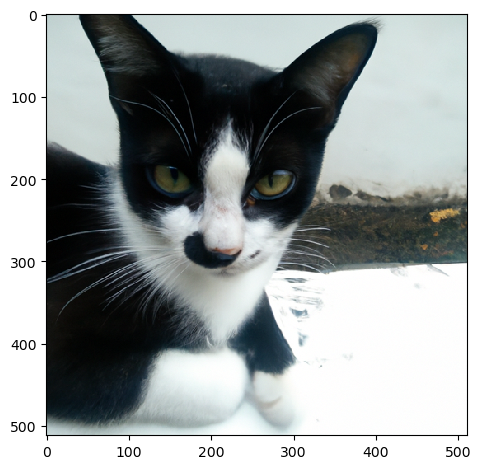

In [3]:
imshow(image)

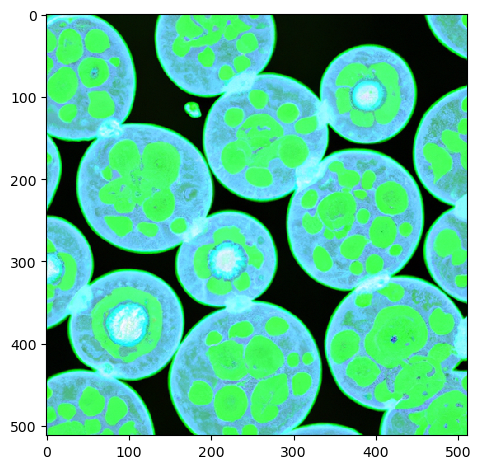

In [6]:
nuclei = prompt_image('an image of 100 nuclei in a fluorescence microscopy image')
imshow(nuclei)

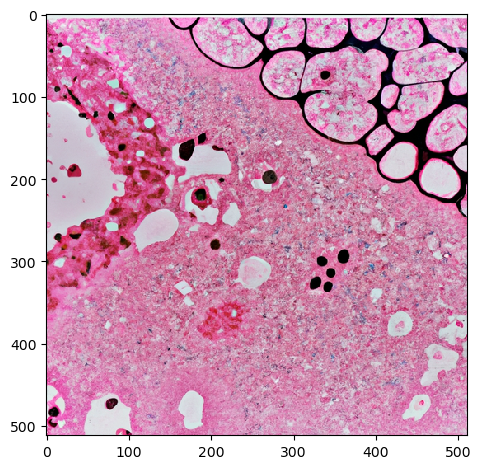

In [7]:
histology = prompt_image('a histology image of lung cancer cells and some healthy tissue')
imshow(histology)